In [305]:
from importlib import reload
import scModel
reload(scModel)
myModel = scModel.Model(Del0=0.0, Deld=0, Dels=1.5, mu=2.7, t=1)

H = myModel.HBdG()

In [306]:
G = myModel.simple_stats()
print(G['avgap'])

[2.42778439 0.88924152 5.32236512 0.88924152 2.42778439]


c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\scModel.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[i]=np.sort(e)


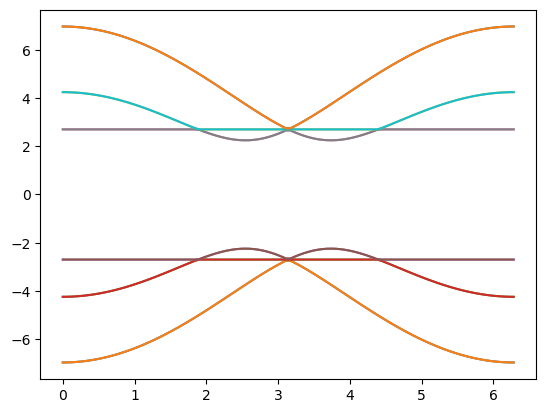

In [307]:
# Calculating energies along 
import numpy as np
import matplotlib.pyplot as plt

k = np.linspace(0, 2*np.pi, 100)

energies = np.array([np.linalg.eigvalsh(H(k_i, k_i)) for k_i in k])
plt.plot(k, energies)

In [308]:
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = myModel.solvHam(kx, ky)
np.shape(energies)

(12, 300)

In [309]:
emax = np.amax(energies)
emax = emax+0.1*emax

In [310]:
G = myModel.simple_stats()
print(G['av'][6])

2.6611825596078504


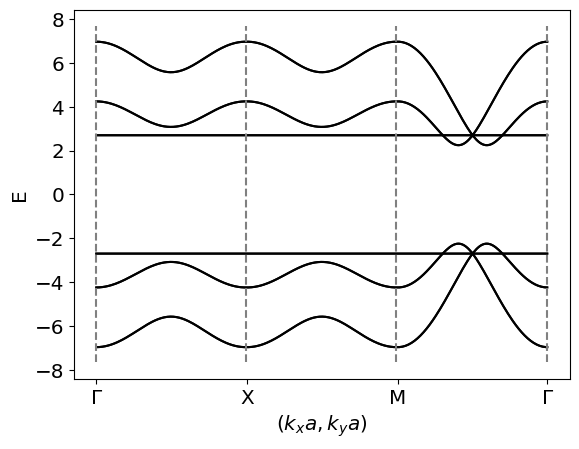

In [311]:
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-3, 3))

for i in energies:
    plt.plot(p, i, color='black')


plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)

plt.savefig("Pictures/ESCpath.png")
plt.show()

In [312]:
H(1, 0)[11]

array([ 0. +0.j,  3. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
        0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  2. +0.j, -2.7+0.j])

In [313]:
k

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\scModel.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[i]=np.sort(e)


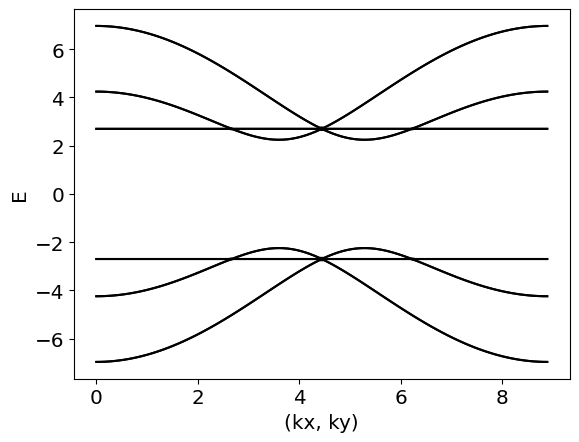

In [314]:
plt.xlabel("(kx, ky)", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

#k = np.linspace(0, 2*np.pi, 300)
energies = myModel.solvHam(k, k)
for i in energies:
    plt.plot(k*np.sqrt(2), i, color='black')

#plt.plot(k*np.sqrt(2), energies[5], color='black', label='Ich in weird')

#.legend()
plt.savefig("Pictures/Ebands_SC.png")
plt.show()

In [315]:
Ens = myModel.Es(k)

In [316]:
np.shape(Ens)

(12, 10100)

In [317]:
energies

array([[-6.96875215, -6.96632211, -6.95903503, ..., -6.95903503,
        -6.96632211, -6.96875215],
       [-6.96875215, -6.96632211, -6.95903503, ..., -6.95903503,
        -6.96632211, -6.96875215],
       [-4.24458402, -4.24240614, -4.23587731, ..., -4.23587731,
        -4.24240614, -4.24458402],
       ...,
       [ 4.24458402,  4.24240614,  4.23587731, ...,  4.23587731,
         4.24240614,  4.24458402],
       [ 6.96875215,  6.96632211,  6.95903503, ...,  6.95903503,
         6.96632211,  6.96875215],
       [ 6.96875215,  6.96632211,  6.95903503, ...,  6.95903503,
         6.96632211,  6.96875215]])

In [318]:
E = myModel.Es(k)
emax=np.amax(energies)
Earr = np.linspace(-emax-1,emax+1,200)
#Earr = np.linspace(-emax-1,emax+1,200)
emax

6.968752146089683

In [319]:
DOS1 = myModel.DOS(Earr, k, 0.4e-1)

In [320]:
DOS1

array([3.52925558e-135, 2.75535414e-114, 3.92874701e-095, 1.02436765e-077,
       4.89227382e-062, 4.28967224e-048, 6.92844854e-036, 2.07160248e-025,
       1.15577637e-016, 1.21973031e-009, 2.49964903e-004, 1.05551259e+000,
       1.08733707e+002, 5.04600130e+002, 5.68897054e+002, 5.71787653e+002,
       5.79639723e+002, 5.90097268e+002, 6.02570111e+002, 6.16983895e+002,
       6.33496653e+002, 6.52441701e+002, 6.74346621e+002, 7.00008882e+002,
       7.30655006e+002, 7.68270126e+002, 8.16349736e+002, 8.81953192e+002,
       9.83719783e+002, 1.20878578e+003, 1.44351252e+003, 1.08501121e+003,
       8.78914426e+002, 7.68567104e+002, 6.90823460e+002, 6.30597487e+002,
       5.81537927e+002, 5.40493358e+002, 5.05719478e+002, 4.77398305e+002,
       4.60166393e+002, 4.17518199e+002, 3.78931660e+002, 3.56627962e+002,
       3.36132927e+002, 3.17989552e+002, 4.13975763e+002, 8.40184828e+002,
       9.06478558e+002, 9.01020986e+002, 9.02640344e+002, 9.09025783e+002,
       9.19840334e+002, 9

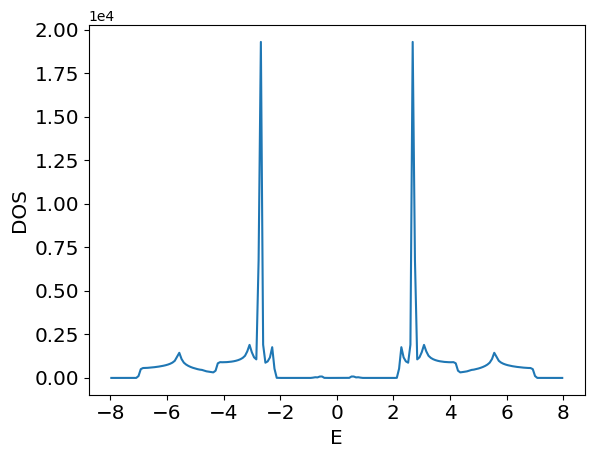

In [321]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS1)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.savefig("Pictures/DOS_SC.png")
plt.show()